# Analysis Of The WeRateDogs Twitter Archive

The WeRateDogs twitter archive collects data on dogs, rates them, and provides humorous comment on each dog rated. Many dog lovers have found this archive very useful and fun. This project seeks to analyze the dogs in the archive and provide insights into the data. 

## Introduction

This analytical work focuses on the tweets of the WeRateDogs twitter archive for 2017. I had to gather some of the data using tweepy after Twitter approved my developer account. 

Some of the insights I hope to gain come from the following questions:

1. What words did the tweet author use most frequently?
2. What apps does the tweet author use most frequently?
3. What rating is most often given to dogs and what dog breeds are associated with those ratings?
4. What 3 dog breeds are most often retweeted?
5. What 3 dog breeds are most often liked or favorited?

Join me on this journey as I explore the data collected. 

## Importing Useful Libraries

In [21]:
import pandas as pd 
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


## Gathering Data

The data will be collected from three files. Then the files will be merged for consistency and data quality. 

### The twitter archive of the WeRateDogs page

The twitter archive was provided by the admins of the twitter page on WeRateDogs. 

In [2]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### The tweet image predictions

A neural network was used to classify the images for each tweet. Then the three most probable predictions were made on these images. This predictions have already been done and can be retrieved online using the requests library. 

In [3]:
import requests 

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open("image_predictions.tsv", "wb") as file_handler:
    file_handler.write(response.content)

Then I open the tab separated file as as dataframe. 

In [4]:
image_predictions = pd.read_csv("image_predictions.tsv", sep="\t")
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Additional Twitter Data

I need to collect the retweet counts, likes count and other data using the tweet ID for the twitter account. I will be using the tweepy library to get this data. 

In [5]:
import tweepy
# You need to insert your keys for the Twitter developer account here, 
# otherwise use the tweet_json.txt file I provided.

# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# This cell has to run only once, hence why I commented it out. 

# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_archive.tweet_id.values
# print("The length of the tweet ids:", len(tweet_ids))

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {} #collects all the failed tweet ids
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except Exception as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print("Gathering the data took", end - start, "seconds")
# print(fails_dict)

Let's read the text file to see what it contains.

In [7]:
tweets_list = []
with open("tweet_json.txt", "r") as file:
    for line in file:
        data = json.loads(line)
        tweets_list.append(data)

We'll now look at the features of each line of json data in the list. 

In [8]:
tweets_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

I will now put this into a dataframe taking only the keys I need. I need just the tweet_id, retweet_count, and favorite_count so I can harmonize them with the data I have. 

In [9]:
counts_tweet = pd.DataFrame(tweets_list, columns=['id_str', 'retweet_count', 'favorite_count'])
counts_tweet.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,6877,32876
1,892177421306343426,5178,28402
2,891815181378084864,3421,21352
3,891689557279858688,7085,35849
4,891327558926688256,7593,34292


I now rename the id_str to tweet_id to harmonize it with the other dataframes. 

In [10]:
counts_tweet = counts_tweet.rename(columns={"id_str": "tweet_id"})
counts_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6877,32876
1,892177421306343426,5178,28402
2,891815181378084864,3421,21352
3,891689557279858688,7085,35849
4,891327558926688256,7593,34292


The data gathering is finished. These are the dataframes we produced from the data gathering phase:
1. twitter_archive: For the data on rated dogs and their stages
2. image_predictions: for prediction of the image for each tweet. Three predictions in all
3. counts_tweet: for the retweet and favorite counts of each twee. 


I will now assess these datasets and check for quality issues. 

## Data Assessment

I will assess the data quality of each of the dataframes above one after the other. I will be looking for data quality issues, and then for tidiness of the data or data messiness. 
Low-quality data refers to data that has issues with the content. Some of these issues are inaccurate data, corrupted data, or duplicate data. 
Messy or untidy data refers to data that has issues with the structure. For example, if a variable is spread across more than one column instead of just one column, it is an untidy data. For data to be tidy it has to have the following principles:
1. Each variable forms one column. 
2. Each observation forms a row. 
3. Each observational unit forms a table. 

### Assessing the twitter_archive dataframe

In [13]:
# chcking the twitter_archive data frame first
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
# checking for duplicates
sum(twitter_archive.duplicated())

0

### Assessing the image_predictions dataframe

In [23]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [26]:
# checking a specific prediction. This time when img_num is 3
image_predictions[image_predictions["img_num"] == 3]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,Saluki,0.122079,True,Irish_wolfhound,0.004020,True
602,679828447187857408,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True
609,680085611152338944,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,3,pillow,0.778113,False,apron,0.095023,False,wallet,0.049326,False
627,680836378243002368,https://pbs.twimg.com/media/CXLREjOW8AElfk6.jpg,3,Pembroke,0.427781,True,Shetland_sheepdog,0.160669,True,Pomeranian,0.111250,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
1925,857393404942143489,https://pbs.twimg.com/media/C-YSwA_XgAEOr25.jpg,3,malamute,0.841597,True,Siberian_husky,0.073644,True,Eskimo_dog,0.072129,True
1988,872820683541237760,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,3,pug,0.999120,True,French_bulldog,0.000552,True,bull_mastiff,0.000073,True
2016,879862464715927552,https://pbs.twimg.com/media/DDXmPrbWAAEKMvy.jpg,3,basset,0.813507,True,beagle,0.146654,True,cocker_spaniel,0.009485,True


### Assessing the counts_tweet dataframe

In [27]:
counts_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6877,32876
1,892177421306343426,5178,28402
2,891815181378084864,3421,21352
3,891689557279858688,7085,35849
4,891327558926688256,7593,34292


In [28]:
counts_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2325 non-null   object
 1   retweet_count   2325 non-null   int64 
 2   favorite_count  2325 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


Data Quality issues:

Twitter_archive:
    
    1. The timestamp for the data is the same for the gathered data, so this column is unecessary.
    2. The source column has actual values embedded as text in html that has to be extracted. 
    3. I don't want retweets so I would have to remove all rows that are retweets. The columns affected are retweeted_status_id,retweeted_status_user_id, and retweeted_status_timestamp. 
    4. The expanded_urls column contains the links to the images for a post. These is not needed for the analysis because we have a image_predictions data frame for that.  
    5. The columns in_reply_to_status_id and in_reply_to_user_id are not needed for the analysis. 
    6. I might have to do the rating numerator and the rating denominator columns because I don't think the original data gatherer did a clean work on harvesting these from the tweet text. 

Image_predictions

    1. I don't need the jpg_url column in this dataframe. It is just the link for the images. 
    2. The neural network used to predict the dog names is not perfect and could predict non-dog names for the p1, p2, or p3 columns. 
    3. The p#_dog and p#_conf columns are unecessary after they have been used to make sure the dataframe is tidy. 
    4. I don't need the img_num column. 

Counts_tweet

    1. The tweet_id should be an int64 datatype. 

Data Tidiness Issues:

Twitter_archive:

    1. The dog stages variable is spread across four columns, "doggo", "floofer", "pupper", and	"puppo." These has to be in only one column. 

Image_predictions 

    1. The p1, p2, and p3 dog names could be merged to one column, dog name.
    2. This dataframe contains information for the twitter_archive dataframe. 

Counts_tweet

    1. For a tidy table, we need each observational unit to form one table. This is not the case. The information in this dataframe should be in the twitter_archive dataframe. But first note the inaccuracy datatype for tweet_id in this dataframe before acting on it. 



## Data Cleaning

Based on the assessment made above, the data will have to be cleaned thoroughly and tested again to make sure the issues found have been resolved. 

In [30]:
# creating a copy of all the dataframes before working on them
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
counts_tweet_clean = counts_tweet.copy()

I would have started dealing with any missing data but since there are none for the columns of interest, I will now start with the data tidiness issues. 

### Cleaning the Twitter_archive dataframe

#### Define

Combine the dog stages into one variable, dog_stage, from the four columns "doggo", "floofer", "pupper", and	"puppo."   
 


### Code 

In [31]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [42]:
# collect the dog stage columns into a dataframe
dog_stage = twitter_archive_clean[['tweet_id', 'doggo','floofer','pupper','puppo']]
dog_stage

,tweet_id,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,None,None
1,892177421306343426,None,None,None,None
2,891815181378084864,None,None,None,None
3,891689557279858688,None,None,None,None
4,891327558926688256,None,None,None,None
...,...,...,...,...,...
2351,666049248165822465,None,None,None,None
2352,666044226329800704,None,None,None,None
2353,666033412701032449,None,None,None,None
2354,666029285002620928,None,None,None,None


In [44]:
# melt the columns into the short form dataframe 
dog_stage = pd.melt(dog_stage, id_vars="tweet_id", value_vars=["doggo","floofer","pupper","puppo"], var_name="dog_stage")
dog_stage

,tweet_id,dog_stage,value
0,892420643555336193,doggo,None
1,892177421306343426,doggo,None
2,891815181378084864,doggo,None
3,891689557279858688,doggo,None
4,891327558926688256,doggo,None
...,...,...,...
9419,666049248165822465,puppo,None
9420,666044226329800704,puppo,None
9421,666033412701032449,puppo,None
9422,666029285002620928,puppo,None


In [48]:
# remove all the rows with value None 
dog_stage_nonull = dog_stage[dog_stage['value'] != "None"]
dog_stage_nonull.value.value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: value, dtype: int64

In [50]:
# visualize the nonull dataframe
dog_stage_nonull

,tweet_id,dog_stage,value
9,890240255349198849,doggo,doggo
43,884162670584377345,doggo,doggo
99,872967104147763200,doggo,doggo
108,871515927908634625,doggo,doggo
110,871102520638267392,doggo,doggo
...,...,...,...
8015,752519690950500352,puppo,puppo
8029,751132876104687617,puppo,puppo
8103,744995568523612160,puppo,puppo
8116,743253157753532416,puppo,puppo


In [51]:
# merge this with the original dataframe, twitter_archive_clean using left join
twitter_archive_clean = pd.merge(twitter_archive_clean, dog_stage_nonull, on="tweet_id", how="left")

In [52]:
# now visualize what was done
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,value
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN,NaN


In [53]:
# make sure it tallies with the earlier report
twitter_archive_clean.dog_stage.value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: dog_stage, dtype: int64

In [54]:
# I will now remove all the columns that were used in the dog stage melting, except dog_stage
twitter_archive_clean = twitter_archive_clean.drop(["doggo","floofer","pupper","puppo",	"value"], axis=1)

#### Test

Let's visualize the combination of the four columns into one variable, dog_stagfe

In [55]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Define
1. Merge the p1, p2, and p3 dog names in image_predictions dataframe into one variable, dog_name
The dog names depend on the predictions and the boolean targets that states if the prediction was really a dog. So we will use the p#_conf andn p#_dog columns in these tidiness issue. # means 1, or 2, or 3.
2. Drop all names starting with p after creating the dog_names. They are no longer necessary.  

#### Code 
First I loop through the dataframe and see if the first dog boolean is true, I pick the dog name as the most probable dog name, if not, I pick the second, and if not I pick the third, and if all true are not dog names, I insert the string: "Prediction not a dog name."

In [67]:
def dog_name(x):
    if x["p1_dog"] == True:
        return x["p1"].lower()
    elif x["p2_dog"] == True:
        return x["p2"].lower()
    elif x["p3_dog"] == True:
        return x["p3"].lower()
    else:
        return "not a dog"               

In [68]:
image_predictions_clean['dog_name'] = image_predictions_clean.apply(dog_name, axis=1)

In [70]:
# next we drop all names starting with p
image_predictions_clean.drop(["p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf","p3_dog"], axis=1, inplace=True)

#### Test

In [71]:
image_predictions_clean

,tweet_id,jpg_url,img_num,dog_name
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua


#### Define
The tweet_id in counts_tweet should be in the int64 datatype and not a string. 


#### Code

In [73]:
counts_tweet_clean.tweet_id = counts_tweet_clean['tweet_id'].astype("int64")

#### Test

In [74]:
counts_tweet_clean.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

#### Define
Drop the timestamp, expanded_urls, in_reply_to_status_id, and in_reply_to_user_id columns in the twitter_archive_clean dataframe.
    

#### Code

In [77]:
twitter_archive_clean.drop(["expanded_urls", "timestamp", "in_reply_to_status_id", "in_reply_to_user_id"], axis=1, inplace=True)

#### Test

In [78]:
twitter_archive_clean

,tweet_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,NaN
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,NaN
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,NaN
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,NaN
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...,...
2365,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,5,10,None,NaN
2366,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,6,10,a,NaN
2367,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,9,10,a,NaN
2368,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,7,10,a,NaN


#### Define
Extract the text inside html a tags in the source column in twitter_archive dataframe.


#### Code 

In [92]:
def get_text(x):
    splitted = x.split("</")
    splitted = splitted[0].split(">")
    return splitted[1].strip()

In [93]:
twitter_archive_clean["source_split"] = twitter_archive_clean.source.apply(get_text)

In [96]:
# we now drop source column and rename source_split to source
twitter_archive_clean.drop("source", axis=1, inplace=True)

In [99]:
twitter_archive_clean.rename(columns={"source_split": "source"}, inplace=True)

#### Test

In [101]:
twitter_archive_clean.head()

,tweet_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,dog_stage,source
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,NaN,Twitter for iPhone
1,892177421306343426,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,NaN,Twitter for iPhone
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,NaN,Twitter for iPhone
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,NaN,Twitter for iPhone
4,891327558926688256,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,NaN,Twitter for iPhone


#### Define
Remove all rows that are retweets and then drop the columns specifying retweets after that in the twitter_archive dataframe. 


#### Code

In [107]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
twitter_archive_clean

,tweet_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,dog_stage,source
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,NaN,Twitter for iPhone
1,892177421306343426,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,NaN,Twitter for iPhone
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,NaN,Twitter for iPhone
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,NaN,Twitter for iPhone
4,891327558926688256,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,NaN,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...
2365,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,5,10,None,NaN,Twitter for iPhone
2366,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,6,10,a,NaN,Twitter for iPhone
2367,666033412701032449,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,9,10,a,NaN,Twitter for iPhone
2368,666029285002620928,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,7,10,a,NaN,Twitter for iPhone


In [110]:
# deleting the retweet columns
twitter_archive_clean.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1, inplace=True)


/tmp/ipykernel_6068/327228248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1, inplace=True)


#### Test

In [111]:
twitter_archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,source
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,Twitter for iPhone
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,Twitter for iPhone
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,Twitter for iPhone
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,Twitter for iPhone
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,Twitter for iPhone


#### Define
Get the rating for numerator and denominator again in twitter_archive_clean. The earlier one is unclean. 


#### Code

In [123]:
import re
def findreg(x):
    pattern = r'[\d]{1,}\/[\d]{1,}'
    matched = re.findall(pattern, x)
    # some matches are two, so take the second one then
    if len(matched) == 2:
        matched = matched[1]
        first = matched.split("/")
        first = first[0]
        return first
    else:
        first = matched[0].split("/")
        first = first[0]
        return first


In [124]:
twitter_archive_clean['rating_numerator_2'] = twitter_archive_clean.text.apply(findreg)

/tmp/ipykernel_6068/2120853937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['rating_numerator_2'] = twitter_archive_clean.text.apply(findreg)


In [125]:
twitter_archive_clean['rating_denominator_2'] = 10

/tmp/ipykernel_6068/3640823041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['rating_denominator_2'] = 10


In [126]:
twitter_archive_clean

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,source,rating_denominator_2,rating_numerator_2
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,Twitter for iPhone,10,13
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,Twitter for iPhone,10,13
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,Twitter for iPhone,10,12
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,Twitter for iPhone,10,13
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,Twitter for iPhone,10,12
...,...,...,...,...,...,...,...,...,...
2365,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN,Twitter for iPhone,10,5
2366,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN,Twitter for iPhone,10,6
2367,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10,a,NaN,Twitter for iPhone,10,9
2368,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN,Twitter for iPhone,10,7


In [127]:
# drop the earlier numerator and denominator
twitter_archive_clean.drop(["rating_numerator",	"rating_denominator"], axis=1, inplace=True)

/tmp/ipykernel_6068/1278307870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean.drop(["rating_numerator",	"rating_denominator"], axis=1, inplace=True)


In [131]:
# rename the rating numerator and denominator
twitter_archive_clean.rename(columns={"rating_denominator_2": "rating_denominator", "rating_numerator_2": "rating_numerator" }, inplace=True)

/tmp/ipykernel_6068/2800548865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean.rename(columns={"rating_denominator_2": "rating_denominator", "rating_numerator_2": "rating_numerator" }, inplace=True)


#### Test

In [132]:
twitter_archive_clean.head()

,tweet_id,text,name,dog_stage,source,rating_denominator,rating_numerator
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,Twitter for iPhone,10,13
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,Twitter for iPhone,10,13
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,Twitter for iPhone,10,12
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,NaN,Twitter for iPhone,10,13
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,NaN,Twitter for iPhone,10,12


#### Define

Drop the jpg_url and img_num columns from the image_predictions dataframe. 
Change the dog name to dog_breed

#### Code

In [134]:
image_predictions_clean.drop(["jpg_url","img_num"], axis=1, inplace=True)

In [136]:
# change dog name
image_predictions_clean.rename(columns={"dog_name": "dog_breed"}, inplace=True)

#### Test

In [137]:
image_predictions_clean.head()

,tweet_id,dog_breed
0,666020888022790149,welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,german_shepherd
3,666044226329800704,rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


#### Define 
Merge the twitter_archive_clean and image_predictions_clean dataframes.

#### Code

In [140]:
# i will do a left merge so as not to lose valuable information
merged_twitter_image = pd.merge(twitter_archive_clean, image_predictions_clean, on="tweet_id", how="left")

#### Test

In [142]:
merged_twitter_image.head()

,tweet_id,text,name,dog_stage,source,rating_denominator,rating_numerator,dog_breed
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,Twitter for iPhone,10,13,not a dog
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,Twitter for iPhone,10,13,chihuahua
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,Twitter for iPhone,10,12,chihuahua
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,NaN,Twitter for iPhone,10,13,labrador_retriever
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,NaN,Twitter for iPhone,10,12,basset


#### Define 

Merge the counts_tweet dataframe with the merged_twitter_image dataframe. Name the new dataframe master_df. 

#### Code

In [143]:
counts_tweet_clean.shape, merged_twitter_image.shape

((2325, 3), (2187, 8))

In [144]:
# I will use inner join for both dataframes merg
master_df = pd.merge(merged_twitter_image, counts_tweet_clean, on="tweet_id", how="inner")

#### Test

In [146]:
master_df.head()

,tweet_id,text,name,dog_stage,source,rating_denominator,rating_numerator,dog_breed,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,Twitter for iPhone,10,13,not a dog,6877,32876
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,Twitter for iPhone,10,13,chihuahua,5178,28402
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,Twitter for iPhone,10,12,chihuahua,3421,21352
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,NaN,Twitter for iPhone,10,13,labrador_retriever,7085,35849
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,NaN,Twitter for iPhone,10,12,basset,7593,34292


### Saving the result of data wrangling. 

The result of the data wrangling will now be saved in a csv file for future reference. 

In [147]:
master_df.to_csv("twitter_archive_master.csv", index=False)

## Exploratory Data Analysis

In this section of the analysis, I will explore the questions and insights I can get from the data saved as twitter_archive_master.csv. The insights will be derived from the questions asked about the data. 

In [4]:
# getting the master dataframe to use
twitter_master = pd.read_csv("twitter_archive_master.csv")
twitter_master.head()

,tweet_id,text,name,dog_stage,source,rating_denominator,rating_numerator,dog_breed,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,Twitter for iPhone,10,13,not a dog,6877,32876
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,Twitter for iPhone,10,13,chihuahua,5178,28402
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,Twitter for iPhone,10,12,chihuahua,3421,21352
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,NaN,Twitter for iPhone,10,13,labrador_retriever,7085,35849
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,NaN,Twitter for iPhone,10,12,basset,7593,34292


#### Question 1: What words did the tweet author use most frequently?

I will have to build a word cloud for this. 

In [31]:
# pulling the collected texts 
text = "".join(twitter_master['text'])
# then I will change the string to lower case
text = text.lower()
# remove non-ascii characters
text = text.encode("ascii", errors='ignore').decode()
# replace / and \ 
text = text.replace("/", "").replace('\\', '')
# remove duplicated words
text_list = text.split(" ")
text_list = set(text_list)
text = " ".join(text_list)
# remove periods and question marks
text = text.replace(".", "").replace("?", "")




NB: I noticed that some of the backslashes "\" won't go away even after replacing them. Would need to do some research on them later. 

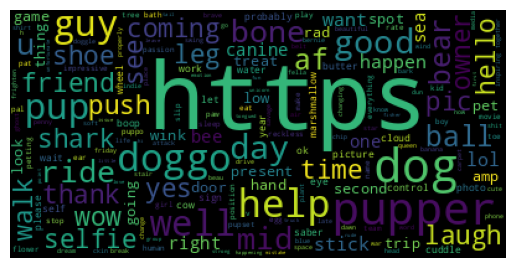

In [32]:
# generate the wordcould image
wordcloud_image = WordCloud().generate(text)
# display the image
plt.imshow(wordcloud_image)
plt.axis("off")
plt.show()

Conclusion:
The word cloud shows that web links are the most frequently posted items by the tweet post author. Also, the doggo dog stage, as well as words like dog, help, and help, along with good, canine, selfie and time count among the most often used words in tweets. 

#### Question 2: What apps does the tweet author use most frequently?

Having a knowledge of the most frequently used app for posting on tweeter will alert us to the device preferred by the author of posts and his tweet preferences. 

## References

1. [Wordcloud tutorial](https://www.datacamp.com/tutorial/wordcloud-python). 